When we load an image via `cv.imread(img_path)` function, the image is loaded as 3D *NumPy* array, which is made up of *red, green* and *blue* (RGB) channels. The values of channel in each pixel will determine the color. For example, suppose we have a 8-bit image, if a specific pixel on the red channel takes a value of 255 while the rest of the channel takes a value of zero, that pixel will be appear to be red.

# Splitting and merging color channels

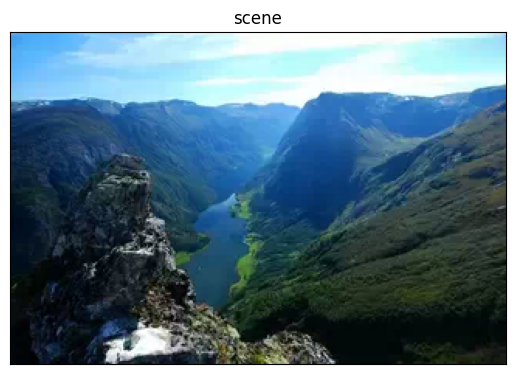

In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def display_inline_img(arr: np.ndarray, title=None, xyticks=False, grayscale=True):
    if grayscale:
        plt.imshow(arr, cmap = plt.cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(arr)
    plt.title(title)
    if not xyticks:
        plt.xticks([]), plt.yticks([])

img = cv.imread("images/scene.webp")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display_inline_img(img_rgb, title="scene", grayscale=False)
plt.show()

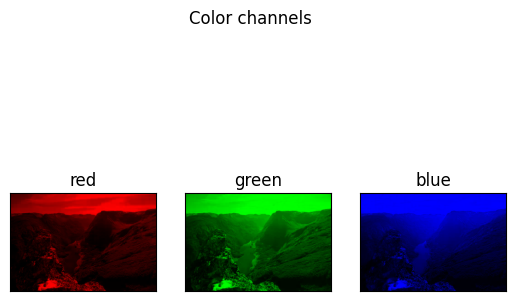

In [6]:
channels = cv.split(img_rgb)
colors = ("red", "green", "blue")

for i, (title, channel) in enumerate(zip(colors, channels)):
    plt.subplot(1, len(colors), i+1)
    img_ch = np.zeros_like(img_rgb)
    img_ch[..., i] = channel
    display_inline_img(img_ch, title=title, grayscale=False)

plt.suptitle("Color channels")
plt.show()

# Color spaces
RGB is an additive color space where colors are created by mixing different intensities of red, green and blue lights. They are commonly used in cameras and digital screens. On the other hand, HSV, which stands for hue, saturation and value is more intuitive for us to manipulate. Hue determines the color types; saturation indicates how much color (higher value implies color with higher purity); value represents the brightness. 

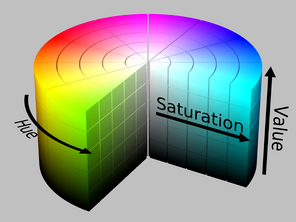

<Figure size 640x480 with 0 Axes>

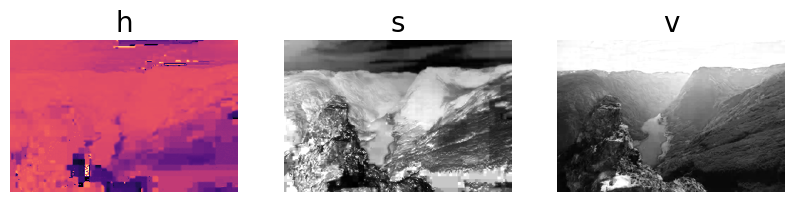

In [15]:
from matplotlib.colors import rgb_to_hsv
img_hsv = rgb_to_hsv(img_rgb)

plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(131), plt.imshow(img_hsv[...,0], cmap='magma'), plt.title('h', size=20), plt.axis('off')
plt.subplot(132), plt.imshow(img_hsv[...,1]), plt.title('s', size=20), plt.axis('off')
plt.subplot(133), plt.imshow(img_hsv[...,2]), plt.title('v', size=20), plt.axis('off')
plt.show()

# Manipulate color channels
## Saturation color channel

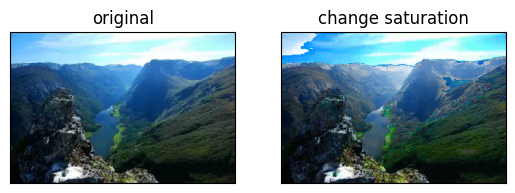

In [24]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

s_mod = np.clip(s * 2, 0, 255).astype(np.uint8)

img_hsv_new = cv.merge((h, s_mod, v))

img_rgb_new = cv.cvtColor(img_hsv_new, cv.COLOR_HSV2RGB)

plt.subplot(121), display_inline_img(img_rgb, title="original", grayscale=False)
plt.subplot(122), display_inline_img(img_rgb_new, title="change saturation", grayscale=False)
plt.show()

## Value color channel

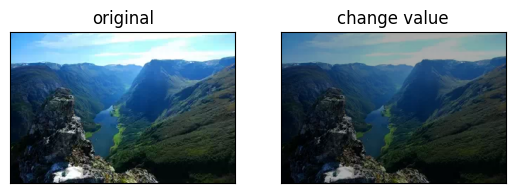

In [25]:
v_new = np.clip(v // 1.5, 0, 255).astype(np.uint8)
img_hsv_new = cv.merge((h, s, v_new))
img_rgb_new = cv.cvtColor(img_hsv_new, cv.COLOR_HSV2RGB)

plt.subplot(121), display_inline_img(img_rgb, title="original", grayscale=False)
plt.subplot(122), display_inline_img(img_rgb_new, title="change value", grayscale=False)
plt.show()

## Hue color channel

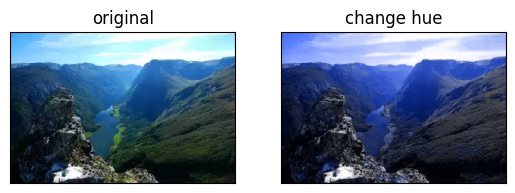

In [27]:
h_new = np.uint8(113*np.ones_like(h))
img_hsv_new = cv.merge((h_new, s, v))
img_rgb_new = cv.cvtColor(img_hsv_new, cv.COLOR_HSV2RGB)

plt.subplot(121), display_inline_img(img_rgb, title="original", grayscale=False)
plt.subplot(122), display_inline_img(img_rgb_new, title="change hue", grayscale=False)
plt.show()